In [1]:
# 导入模块
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score,classification_report
%matplotlib inline

In [2]:
# 载入数据集并划分
iris_data = datasets.load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris_data.data[:, [2, 3]],iris_data.target,test_size = 0.30,random_state = 20)
# x_train    划分出的训练集数据（返回值）
# x_test    划分出的测试集数据（返回值）
# y_train    划分出的训练集标签（返回值）
# y_test    划分出的测试集标签（返回值)
#目标属性 三种类别山鸢尾花、杂色鸢尾花、维吉尼亚鸢尾花
label_list = ['mountainIris', 'variegatedIris', 'virginiaIris']

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 画图函数
def plot_decision_regions(X, y, classifier=None):
    marker_list = ['o', 'x', 's']
    color_list = ['r', 'b', 'g']
    cmap = ListedColormap(color_list[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    t1 = np.linspace(x1_min, x1_max, 666)
    t2 = np.linspace(x2_min, x2_max, 666)
    x1, x2 = np.meshgrid(t1, t2)
    y_hat = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
    y_hat = y_hat.reshape(x1.shape)
    plt.contourf(x1, x2, y_hat, alpha=0.2, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    for ind, clas in enumerate(np.unique(y)):
        plt.scatter(X[y == clas, 0], X[y == clas, 1], alpha=0.8, s=50,c=color_list[ind], marker=marker_list[ind], label=label_list[clas])

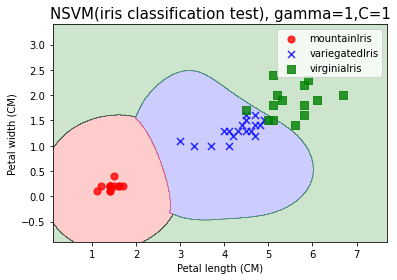

accuracy score : 0.9333333333333333
precision score : 0.9523809523809524
recall score : 0.9285714285714285
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92        18
           2       1.00      0.79      0.88        14

    accuracy                           0.93        45
   macro avg       0.95      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [4]:
# 训练并测试
# rbf为高斯核gamma=1 degree=3 惩罚系数C=1
svm = SVC(kernel='rbf', gamma=1, C=1, random_state=1)
svm.fit(x_train, y_train)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',max_iter=-1, probability=False, random_state=1, shrinking=True,tol=0.001, verbose=False)
y_test_hat = svm.predict(x_test)
plot_decision_regions(x_test, y_test, classifier=svm)
plt.xlabel('Petal length (CM)')#花瓣长度（CM）
plt.ylabel('Petal width (CM)')#花瓣宽度（cm）
plt.title('NSVM(iris classification test), gamma=1,C=1',fontsize=15)
plt.legend()
plt.savefig(fname="svm1.jpg")
plt.show()
print('accuracy score : ',end = '') # 准确度
print(accuracy_score(y_test, y_test_hat))
print('precision score : ',end = '') # 精确度
print(precision_score(y_test, y_test_hat,average='macro'))
print('recall score : ',end = '') # 召回率
print(recall_score(y_test, y_test_hat,average='macro'))
target_names = ['mountainIris', 'variegatedIris', 'virginiaIris']
print(classification_report(y_test, y_test_hat)) # 分类报告

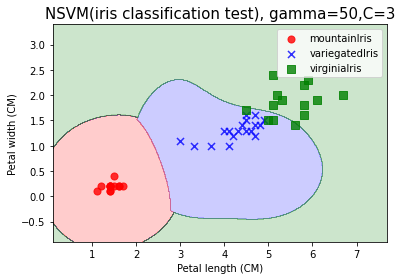

accuracy score : 0.9111111111111111
precision score : 0.9393939393939394
recall score : 0.9047619047619048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



In [5]:
# 训练并测试
# rbf为高斯核gamma=50 degree=3 C=3
svm = SVC(kernel='rbf', gamma=1, C=3, random_state=1)
svm.fit(x_train, y_train)
SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',max_iter=-1, probability=False, random_state=1, shrinking=True,tol=0.001, verbose=False)
y_test_hat = svm.predict(x_test)
plot_decision_regions(x_test, y_test, classifier=svm)
plt.xlabel('Petal length (CM)')#花瓣长度（CM）
plt.ylabel('Petal width (CM)')#花瓣宽度（cm）
plt.title('NSVM(iris classification test), gamma=50,C=3',fontsize=15)
plt.legend()
plt.savefig(fname="svm2.jpg")
plt.show()
print('accuracy score : ',end = '') # 准确度
print(accuracy_score(y_test, y_test_hat))
print('precision score : ',end = '') ## 精确度
print(precision_score(y_test, y_test_hat,average='macro'))
print('recall score : ',end = '') #召回率
print(recall_score(y_test, y_test_hat,average='macro'))
target_names = ['mountainIris', 'variegatedIris', 'virginiaIris']
print(classification_report(y_test, y_test_hat)) # 分类报告